# Training of model

In [1]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import tqdm
from math import sqrt

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('Boliga - Final for training.csv')
df = df.drop(columns = ['Kommune', 'lotSize', 'Relativ Ledighed', 'Total_reported',
                        'Socioeconomic_index', 'expenses_per_school_student',
                       'expenses_sport_and_other_cultural_activities', 'forest_distance',
                       'coast_distance', 'isForeclosure', 'Ejerudgift','buildYear'])

#df_sample = df.sample(1000)
pd.options.display.max_columns = None

/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df.shape

(61618, 25)

In [3]:
df.head()

,basementSize,price,rooms,size,Type,Grundskole,Gymnasiale uddannelser,Erhvervsfaglige uddannelser,KVU,MVU,Bacheloruddannelser,LVU,Kommunal_gennemsnitsinkomst_2017,Population_in_urban_development,average_class_size,lake_distance,doctor_distance,supermarket_distance,school_distance,daycare_distance,hospital_distance,train_distance,pharmacy_distance,library_distance,junction_distance
0,0,18750000,6.0,280,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.13204,0.11111,0.24096,0.35005,0.39428,2.67332,1.05650,0.38665,0.92771,4.65646
1,88,10500000,4.0,83,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.20441,0.29860,0.59852,0.42607,0.43139,2.95715,1.41122,0.70159,1.23705,4.94359
2,0,15000000,7.0,274,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.18899,0.26852,0.71105,0.48610,0.40131,2.92707,1.38115,0.67141,1.29708,4.91351
3,0,19995000,7.0,296,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.20441,0.29860,0.59852,0.42607,0.43139,2.95715,1.41122,0.70159,1.23705,4.94359
4,0,8750000,7.0,163,Ejerlejlighed,13.754726,7.646977,19.268325,4.928181,17.977495,3.627649,26.658495,319745,100.0,22.8,1.25292,0.39571,0.64693,0.36048,0.52840,3.05426,1.50833,0.79860,1.16766,5.04060


### Create dummies, and split X and Y

In [3]:
df_dum = pd.get_dummies(df, drop_first = True, columns = ['Type'])
X = df_dum.drop(columns = ['price'])
y = df_dum['price']

### Split into test, dev, val and train data

In [4]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.5, random_state = 1)

### Linear Regression Model

First, we train (fit) a linear regression on the development (in this case the **training**) data, as it does not need validation (no hyperparameter needs to be optimized)

In [5]:
#Create pipeline (pipe_lr which will be used later, to compare Lasso and LR)
pipe_lr = make_pipeline(PolynomialFeatures(include_bias=True, degree = 2), 
                        StandardScaler(with_mean = 0, with_std = True),
                        LinearRegression())

#Fit pipline to dev-data
pipe_lr.fit(X_dev, y_dev)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=0, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### OLS (linear regression) estimations table

Find a way to get the OLS estimates out here, in a table

In [6]:
OLS_est = sm.OLS(y_dev, X_dev).fit()

OLS_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     5022.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:33:52   Log-Likelihood:            -7.7377e+05
No. Observations:               49294   AIC:                         1.548e+06
Df Residuals:                   49262   BIC:                         1.548e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
basementSize                      8933.8327    244.980     36.468      0.000    8453.668    9413.997
buildYear                          765.8151     58.506     13.090      0.000     651.143     880.488
rooms                            -1.998e+04   6756.066     -2.957      0.003   -3.32e+04   -6733.690
size                              1.718e+04    190.006     90.435      0.000    1.68e+04    1.76e+04
Grundskole                       -6.576e+04   4418.105    -14.883      0.000   -7.44e+04   -5.71e+04
Gymnasiale uddannelser             3.21e+05   1.56e+04     20.510      0.000     2.9e+05    3.52e+05
Erhvervsfaglige uddannelser      -7.329e+04   4248.630    -17.250      0.000   -8.16e+04    -6.5e+04
KVU                              -1.104e+05   1.47e+04     -7.494      0.000   -1.39e+05   -8.15e+04
MVU                              -8.622e+04   4236.494    -20.352      0.000   -9.45e+04   -7.79e+04
Bacheloruddannelser               2.032e+05   4.82e+04      4.214      0.000    1.09e+05    2.98e+05
 LVU                             -3.986e+04   7333.490     -5.435      0.000   -5.42e+04   -2.55e+04
Kommunal_gennemsnitsinkomst_2017     6.8967      0.332     20.761      0.000       6.246       7.548
Population_in_urban_development   7963.5134    895.866      8.889      0.000    6207.604    9719.422
average_class_size               -1.141e+04   6964.493     -1.639      0.101   -2.51e+04    2238.285
lake_distance                     1.431e+04   1405.252     10.180      0.000    1.16e+04    1.71e+04
doctor_distance                    1.43e+04   3263.341      4.382      0.000    7902.690    2.07e+04
supermarket_distance             -3.271e+04   3308.217     -9.887      0.000   -3.92e+04   -2.62e+04
school_distance                   3.204e+04   4576.630      7.001      0.000    2.31e+04     4.1e+04
daycare_distance                  9880.5553   4946.344      1.998      0.046     185.662    1.96e+04
hospital_distance                -1.645e+04    990.150    -16.609      0.000   -1.84e+04   -1.45e+04
train_distance                   -5066.8931    694.042     -7.301      0.000   -6427.225   -3706.562
pharmacy_distance                -2.057e+04   2546.416     -8.076      0.000   -2.56e+04   -1.56e+04
library_distance                 -1.704e+04   2481.356     -6.868      0.000   -2.19e+04   -1.22e+04
junction_distance                 3268.9939    643.241      5.082      0.000    2008.235    4529.753
Type_Ejerlejlighed                1.092e+06   6.21e+04     17.578      0.000     9.7e+05    1.21e+06
Type_Fritidsgrund                 3.968e+06   1.41e+05     28.089      0.000    3.69e+06    4.24e+06
Type_Fritidshus                   1.989e+06    6.4e+04     31.070      0.000    1.86e+06    2.11e+06
Type_Helårsgrund                  3.755e+06    1.3e+0

## Train Lasso Regression (K-fold CV)

Now we want to examine whether the a Lasso regression is more appropriate, and seeks to optimize the hyperparameter.
We will train for an optimized hyperparameter on the validation set, to avoid data leakage and use k-fold crossvalidation to make sure that we have not split our dataset in a lucky or unlucky place. 

In [7]:
from sklearn.model_selection import KFold

#Split data into 5 folds
kfolds = KFold(n_splits=5)
folds = list(kfolds.split(X_dev, y_dev))

#Create Lambda values
lambdas = np.logspace(-1, 7, 12)
# outer loop: lambdas
mseCV = []

for lambda_ in tqdm.tqdm(lambdas):    
    # inner loop: folds
    mseCV_ = []

    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=True),
                                     StandardScaler(),
                                     Lasso(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_lassoCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))

        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambda_mseCV_lasso = pd.DataFrame(mseCV, index=lambdas)

100%|██████████| 12/12 [2:16:49<00:00, 357.11s/it]  


### MSE of the K-fold Crossvalidation - Lasso

Lambda as index

In [8]:
lambda_mseCV_lasso

,0,1,2,3,4
1.000000e-01,2.831965e+12,1.260413e+13,1.768074e+12,2.679605e+12,2.337296e+12
5.336699e-01,2.827059e+12,1.261005e+13,1.767513e+12,2.679546e+12,2.336539e+12
2.848036e+00,2.802419e+12,1.263911e+13,1.764603e+12,2.678959e+12,2.330414e+12
1.519911e+01,2.700116e+12,1.277790e+13,1.748691e+12,2.672321e+12,2.307638e+12
8.111308e+01,2.407817e+12,1.342065e+13,1.675047e+12,2.560026e+12,2.193921e+12
4.328761e+02,2.249848e+12,1.831944e+13,1.572803e+12,2.287128e+12,1.845917e+12
2.310130e+03,2.246939e+12,1.010932e+13,1.514323e+12,1.795144e+12,1.662090e+12
1.232847e+04,2.330799e+12,1.590631e+12,1.599433e+12,1.667488e+12,1.635345e+12
6.579332e+04,2.478147e+12,1.679357e+12,1.831601e+12,1.751166e+12,1.817800e+12
3.511192e+05,2.915373e+12,2.031745e+12,2.203023e+12,2.271948e+12,1.950150e+12


###  Mean MSE of K-fold CV - Lasso

In [9]:
# Calculates the mean of the folds
mse_mean_lasso = lambda_mseCV_lasso.mean(axis = 1)

### Plot Average MSE over Lambda - Lasso

[Text(0,0.5,'MSE'), Text(0.5,0,'Lambda')]

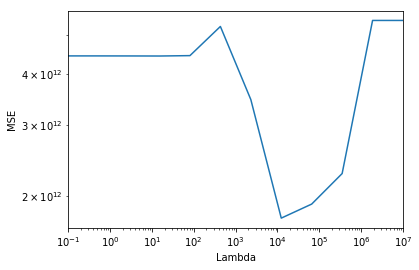

In [10]:
#Plot mean square errors
COL = ['Average MSE']
mse_mean_lasso.columns = COL

#Both axis are logarythmical 
ax = mse_mean_lasso.plot(logx = True, logy = True)
ax.set(xlabel = 'Lambda', ylabel = 'MSE')


### Finding the optimal hyperparameter for Lasso

Where was the mean mse smallest?

In [11]:
mse_mean_lasso.nsmallest(1)

12328.467394    1.764739e+12
dtype: float64

## Train Ridge Regression (K-fold CV)

In [12]:
#Split data into 5 folds
kfolds = KFold(n_splits=5)
folds = list(kfolds.split(X_dev, y_dev))

#Create Lambda values
lambdas = np.logspace(-1, 7, 12)
# outer loop: lambdas
mseCV = []

for lambda_ in tqdm.tqdm(lambdas):    
    # inner loop: folds
    mseCV_ = []

    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_ridgeCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=True),
                                     StandardScaler(),
                                     Ridge(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_ridgeCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_ridgeCV.predict(X_val), y_val))

        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambda_mseCV_ridge = pd.DataFrame(mseCV, index=lambdas)

100%|██████████| 12/12 [40:56<00:00, 206.75s/it]


### MSE of the K-fold Crossvalidation - Ridge

Lambda as index

In [13]:
lambda_mseCV_ridge

,0,1,2,3,4
1.000000e-01,5.567202e+12,3.186564e+13,3.466011e+12,4.571067e+12,5.485509e+12
5.336699e-01,4.416797e+12,2.559059e+13,2.595326e+12,3.349633e+12,3.568724e+12
2.848036e+00,4.135396e+12,2.291449e+13,1.999430e+12,2.794764e+12,2.645210e+12
1.519911e+01,3.019644e+12,2.225017e+13,1.654110e+12,2.451778e+12,2.110118e+12
8.111308e+01,2.374617e+12,2.037564e+13,1.486566e+12,2.040216e+12,1.853832e+12
4.328761e+02,2.255346e+12,1.657115e+13,1.458870e+12,1.751136e+12,1.696521e+12
2.310130e+03,2.238653e+12,8.593573e+12,1.533356e+12,1.636932e+12,1.588441e+12
1.232847e+04,2.281382e+12,2.651279e+12,1.637992e+12,1.601040e+12,1.545406e+12
6.579332e+04,2.377840e+12,1.581054e+12,1.768986e+12,1.648998e+12,1.563863e+12
3.511192e+05,2.584702e+12,1.770691e+12,2.050472e+12,1.844861e+12,1.674892e+12


###  Mean MSE of K-fold CV - Ridge

In [14]:
# Calculates the mean of the folds
mse_mean_ridge = lambda_mseCV_ridge.mean(axis = 1)

### Plot Average MSE over Lambda - Ridge

[Text(0,0.5,'MSE'), Text(0.5,0,'Lambda')]

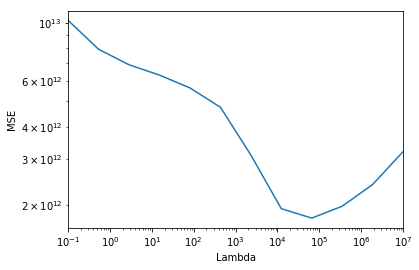

In [15]:
#Plot mean square errors
COL = ['Average MSE']
mse_mean_ridge.columns = COL

#Both axis are logarythmical 
ax = mse_mean_ridge.plot(logx = True, logy = True)
ax.set(xlabel = 'Lambda', ylabel = 'MSE')


### Finding the optimal hyperparameter for Ridge

Where was the mean mse smallest?

In [16]:
mse_mean_ridge.nsmallest(1)

65793.322466    1.788148e+12
dtype: float64

## Train Elastic Net Regression (K-fold CV)

In [17]:
#Split data into 5 folds
kfolds = KFold(n_splits=5)
folds = list(kfolds.split(X_dev, y_dev))

#Create Lambda values
lambdas = np.logspace(-1, 7, 12)
# outer loop: lambdas
mseCV = []

for lambda_ in tqdm.tqdm(lambdas):    
    # inner loop: folds
    mseCV_ = []

    for train_idx, val_idx in folds:        
        # train model and compute MSE on test fold
        pipe_elasticCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=True),
                                     StandardScaler(),
                                     ElasticNet(alpha=lambda_, random_state=1))            
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx] 
        pipe_elasticCV.fit(X_train, y_train)        
        mseCV_.append(mse(pipe_elasticCV.predict(X_val), y_val))

        
    # store result    
    mseCV.append(mseCV_) 
    
# convert to DataFrame
lambda_mseCV_elastic = pd.DataFrame(mseCV, index=lambdas)

100%|██████████| 12/12 [1:31:26<00:00, 195.95s/it]  


### MSE of the K-fold Crossvalidation - Elastic
Lambda as index

In [18]:
lambda_mseCV_elastic

,0,1,2,3,4
1.000000e-01,2.227972e+12,9.140086e+12,1.502041e+12,1.651462e+12,1.591997e+12
5.336699e-01,2.278948e+12,2.975221e+12,1.619032e+12,1.616703e+12,1.543874e+12
2.848036e+00,2.366915e+12,1.586301e+12,1.745792e+12,1.639172e+12,1.560776e+12
1.519911e+01,2.556723e+12,1.744340e+12,2.013703e+12,1.816399e+12,1.657449e+12
8.111308e+01,2.962535e+12,2.120302e+12,2.472446e+12,2.257478e+12,1.946367e+12
4.328761e+02,3.752302e+12,2.865709e+12,3.152769e+12,3.161429e+12,2.593430e+12
2.310130e+03,5.022560e+12,4.084204e+12,4.351102e+12,4.552892e+12,3.748200e+12
1.232847e+04,5.831676e+12,4.870403e+12,5.147642e+12,5.406363e+12,4.509990e+12
6.579332e+04,6.063931e+12,5.097100e+12,5.377280e+12,5.647087e+12,4.729345e+12
3.511192e+05,6.112030e+12,5.144078e+12,5.424810e+12,5.696714e+12,4.774739e+12


###  Mean MSE of K-fold CV - Elastic

In [19]:
# Calculates the mean of the folds
mse_mean_elastic = lambda_mseCV_elastic.mean(axis = 1)

### Plot Average MSE over Elastic Net

[Text(0,0.5,'MSE'), Text(0.5,0,'Lambda')]

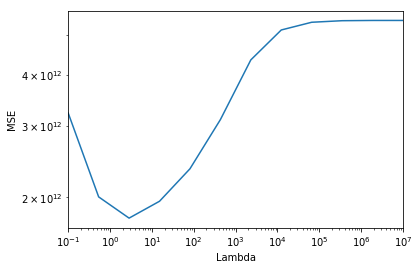

In [20]:
#Plot mean square errors
COL = ['Average MSE']
mse_mean_elastic.columns = COL

#Both axis are logarythmical 
ax = mse_mean_elastic.plot(logx = True, logy = True)
ax.set(xlabel = 'Lambda', ylabel = 'MSE')

### Finding the optimal hyperparameter for Ridge

Where was the mean mse smallest?

In [21]:
mse_mean_elastic.nsmallest(1)

2.848036    1.779791e+12
dtype: float64

# Comparison of Lasso, Ridge, Elastic Net and Linear Regression

Is done after the optimized hyperparameters is found (after training on validation data)
This comparison is done on the **test data!** and is thus the final step in training and selecting our model


In [22]:
# Optimal lambda is inserted into the Lasso-model
optimal_lambda_lasso = lambda_mseCV_lasso.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_lassoCV = make_pipeline(PolynomialFeatures(degree = 3, include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda_lasso.index[0], random_state=1))
pipe_lassoCV.fit(X_dev,y_dev)

#Optimal lambda for ridge model: 
optimal_lambda_ridge = lambda_mseCV_ridge.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_ridgeCV = make_pipeline(PolynomialFeatures(degree = 3, include_bias=False), 
                             StandardScaler(),
                             Lasso(alpha=optimal_lambda_ridge.index[0], random_state=1))
pipe_ridgeCV.fit(X_dev,y_dev)

#Optimal lambda for elastic net model: 
optimal_lambda_elastic = lambda_mseCV_elastic.mean(axis=1).nsmallest(1)

# retrain/re-estimate model using optimal hyperparameters
pipe_elasticCV = make_pipeline(PolynomialFeatures(degree = 3, include_bias=False), 
                             StandardScaler(),
                             ElasticNet(alpha=optimal_lambda_elastic.index[0], random_state=1))
pipe_elasticCV.fit(X_dev,y_dev)

# compare performance by mse
models = {'Lasso CV': pipe_lassoCV, 'Ridge CV': pipe_ridgeCV, 'ElasticNet CV': pipe_elasticCV,
          'LinReg': pipe_lr}
for name, model in models.items():
    score_mse = mse(model.predict(X_test),y_test)
    score_mae = mae(model.predict(X_test),y_test)
    score_rmse = sqrt(mse(model.predict(X_test),y_test))
    
    print("MSE: " + name, round(score_mse, 2))
    print("RMSE: " + name, round(score_rmse, 2))
    print("MAE: " + name, round(score_mae, 2))

MSE: Lasso CV 1857397183808.82
RMSE: Lasso CV 1362863.6
MAE: Lasso CV 717564.25
MSE: Ridge CV 2049567808150.65
RMSE: Ridge CV 1431631.17
MAE: Ridge CV 768061.82
MSE: ElasticNet CV 1976250079762.2
RMSE: ElasticNet CV 1405791.62
MAE: ElasticNet CV 714205.29
MSE: LinReg 2455019060439.22
RMSE: LinReg 1566850.04
MAE: LinReg 689237.04


## Subconclusion

The model is too complex and very unable to predict out-of-sample data. 
Though the Lasso is a great imporvement to the simple linear regression, it still produces error in the realm of trillions. 

## Error Table

We calculate the Mean Absolute Error, Mean Squared Error and Root Mean Squard Errors of the differnet models: OLS (Linear Regression), Lasso, Ridge.

## Correlation plot

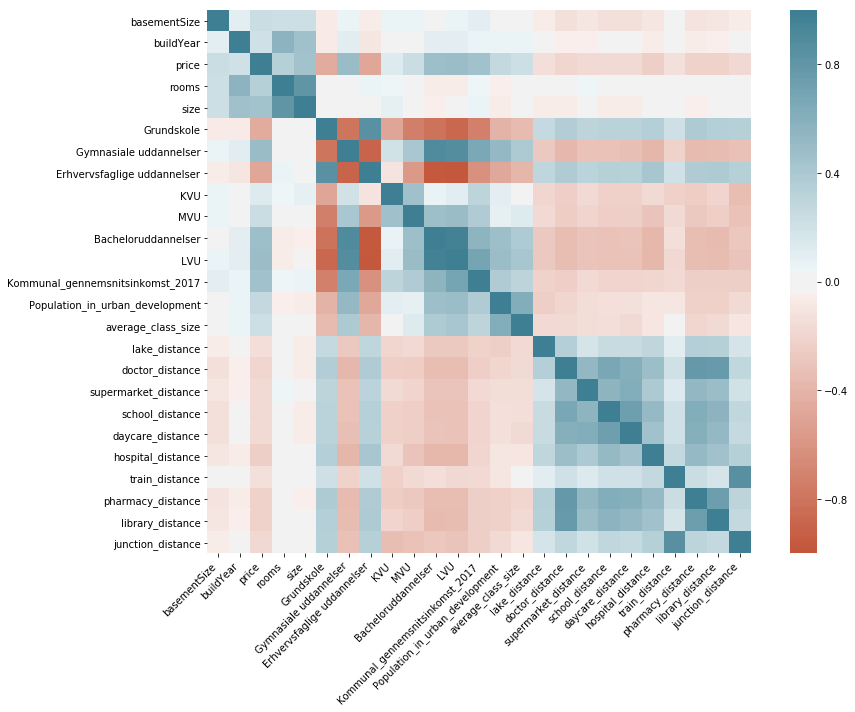

In [23]:
corr = df.corr()
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);